In [1]:
import os
import cv2
import time
import argparse
import subprocess
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def predict(img, h, w):
    blob = cv2.dnn.blobFromImage(img, 1.0, (w, h),
        (103.939, 116.779, 123.680), swapRB=False, crop=False)

    print ('[INFO] Setting the input to the model')
    net.setInput(blob)

    print ('[INFO] Starting Inference!')
    start = time.time()
    out = net.forward()
    end = time.time()
    print ('[INFO] Inference Completed successfully!')

    # Reshape the output tensor and add back in the mean subtraction, and
    # then swap the channel ordering
    out = out.reshape((3, out.shape[2], out.shape[3]))
    out[0] += 103.939
    out[1] += 116.779
    out[2] += 123.680
    out /= 255.0
    out = out.transpose(1, 2, 0)

    # Printing the inference time
    if False:
        print ('[INFO] The model ran in {:.4f} seconds'.format(end-start))

    return out

In [3]:
# Source for this function:
# https://github.com/jrosebr1/imutils/blob/4635e73e75965c6fef09347bead510f81142cf2e/imutils/convenience.py#L65
def resize_img(img, width=None, height=None, inter=cv2.INTER_AREA):
    dim = None
    h, w = img.shape[:2]

    if width is None and height is None:
        return img
    elif width is None:
        r = height / float(h)
        dim = (int(w * r), height)
    elif height is None:
        r = width / float(w)
        dim = (width, int(h * r))

    resized = cv2.resize(img, dim, interpolation=inter)
    return resized

In [4]:
models_path = './models/instance_norms/'

In [5]:
# Check if there are models to be loaded and list them
models = []
for f in sorted(os.listdir(models_path)):
    if f.endswith('.t7'):
        models.append(f)

if len(models) == 0:
    raise Exception('The model path doesn\'t contain models')

In [6]:
models

['candy.t7',
 'feathers.t7',
 'la_muse.t7',
 'mosaic.t7',
 'the_scream.t7',
 'udnie.t7']

In [7]:
# Load the neural style transfer model
path = models_path + ('' if models_path.endswith('/') else '/')
print (path + models[0])
print ('[INFO] Loading the model...')

./models/instance_norms/candy.t7
[INFO] Loading the model...


In [8]:
model_loaded_i = -1
total_models = len(os.listdir(models_path))

In [9]:
model_loaded_i = 0
model_to_load = path + models[model_loaded_i]

In [10]:
net = cv2.dnn.readNetFromTorch(model_to_load)
print ('[INFO] Model Loaded successfully!')

[INFO] Model Loaded successfully!


In [11]:
image_path = './input.jpg'

In [12]:
img = cv2.imread(image_path)

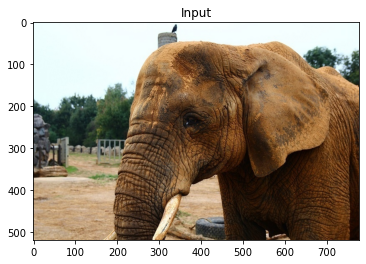

In [13]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Input'); plt.show()

In [14]:
print ('[INFO] Reading the image')
img = cv2.imread(image_path)
print ('[INFO] Image Loaded successfully!')

img = resize_img(img, width=600)

h, w  = img.shape[:2]

# Get the output from the pretrained model
out = predict(img, h, w)

# show the image
if False:
    cv2.imshow('Input Image', img)

cv2.imshow('Stylized image', out)
print ('[INFO] Hit Esc to close!')
cv2.waitKey(0)

#if FLAGS.save_image_with_name is not None:
cv2.imwrite("output.JPG",out)

[INFO] Reading the image
[INFO] Image Loaded successfully!
[INFO] Setting the input to the model
[INFO] Starting Inference!
[INFO] Inference Completed successfully!
[INFO] Hit Esc to close!


True

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


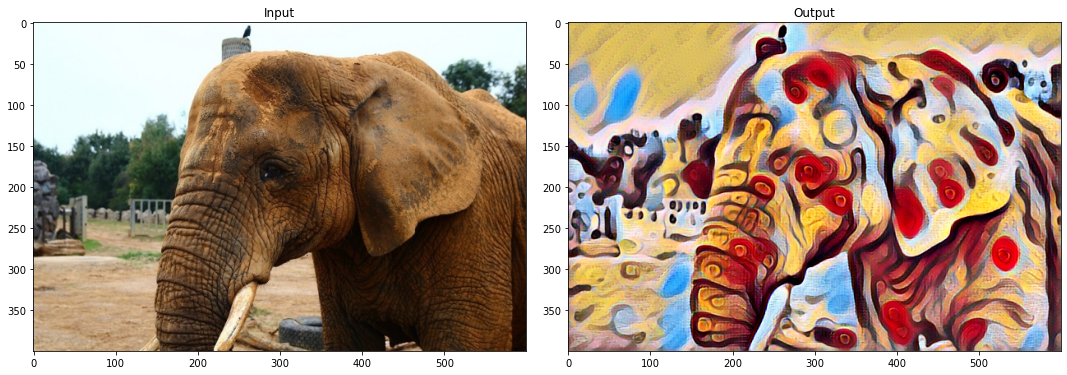

In [15]:
row, col = 1, 2
fig, axs = plt.subplots(row, col, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Input')
cv2.imwrite('input.jpg', img)

axs[1].imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
axs[1].set_title('Output')
cv2.imwrite('output.jpg', out)

plt.show()
